In [3]:
import lbforaging
from games.foraging import Foraging 
import numpy as np
import time
from agents.independent_q_learning import IQL

In [4]:
game = Foraging(config="Foraging-8x8-2p-2f-v3")

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [5]:
game.reset()

#print game information
rewards = game.rewards
observations = game.observations
terminations = game.terminations
truncations = game.truncations
infos = game.infos
print("Game Information:")
print("Rewards: ", rewards)
print("Observations: ", observations)
print("Terminations: ", terminations)

print("Truncations: ", truncations)
print("Infos: ", infos)

Game Information:
Rewards:  {'agent_0': 0, 'agent_1': 0}
Observations:  {'agent_0': array([5., 3., 1., 5., 6., 1., 0., 5., 1., 7., 3., 1.], dtype=float32), 'agent_1': array([5., 3., 1., 5., 6., 1., 7., 3., 1., 0., 5., 1.], dtype=float32)}
Terminations:  {'agent_0': False, 'agent_1': False}
Truncations:  {'agent_0': False, 'agent_1': False}
Infos:  {'agent_0': {}, 'agent_1': {}}


In [6]:
def run(game, agents, verbose=False, render=False):

    # Initialize the game
    game.reset()

    # Initialize rewards for each agent
    cum_rewards = dict(map(lambda agent: (agent, 0), game.agents))

    # render the game if required
    if render:
        game.render()
        time.sleep(0.5)

    while not game.done():

        # Get actions from each agent
        actions = dict(map(lambda agent: (agent, agents[agent].action()), game.agents))

        # Perform the actions in the game
        game.step(actions)

        # Update the cum_rewards for each agent
        for agent in game.agents:
            agents[agent].update()
            cum_rewards[agent] += game.reward(agent)

        # Print the rewards if verbose is enabled
        if verbose:
            for agent in game.agents:
                    print(f"Agent {agent} reward: {game.reward(agent)}")
                    print(f"Agent {agent} observe: {game.observe(agent)}")
            
        if render:
            game.render()
            time.sleep(0.5)
        
    return cum_rewards

In [7]:
agents = {agent: IQL(game, agent) for agent in game.agents}
reward_list = {agent: [] for agent in game.agents}

for i in range(10000):
    print(f"Run {i+1}")
    reward = run(game, agents, verbose=False, render=False)
    for agent in game.agents:
        reward_list[agent].append(reward[agent])
        

Run 1
Run 2
Run 3
Run 4
Run 5
Run 6
Run 7
Run 8
Run 9
Run 10
Run 11
Run 12
Run 13
Run 14
Run 15
Run 16
Run 17
Run 18
Run 19
Run 20
Run 21
Run 22
Run 23
Run 24
Run 25
Run 26
Run 27
Run 28
Run 29
Run 30
Run 31
Run 32
Run 33
Run 34
Run 35
Run 36
Run 37
Run 38
Run 39
Run 40
Run 41
Run 42
Run 43
Run 44
Run 45
Run 46
Run 47
Run 48
Run 49
Run 50
Run 51
Run 52
Run 53
Run 54
Run 55
Run 56
Run 57
Run 58
Run 59
Run 60
Run 61
Run 62
Run 63
Run 64
Run 65
Run 66
Run 67
Run 68
Run 69
Run 70
Run 71
Run 72
Run 73
Run 74
Run 75
Run 76
Run 77
Run 78
Run 79
Run 80
Run 81
Run 82
Run 83
Run 84
Run 85
Run 86
Run 87
Run 88
Run 89
Run 90
Run 91
Run 92
Run 93
Run 94
Run 95
Run 96
Run 97
Run 98
Run 99
Run 100
Run 101
Run 102
Run 103
Run 104
Run 105
Run 106
Run 107
Run 108
Run 109
Run 110
Run 111
Run 112
Run 113
Run 114
Run 115
Run 116
Run 117
Run 118
Run 119
Run 120
Run 121
Run 122
Run 123
Run 124
Run 125
Run 126
Run 127
Run 128
Run 129
Run 130
Run 131
Run 132
Run 133
Run 134
Run 135
Run 136
Run 137
Run 138
Run 

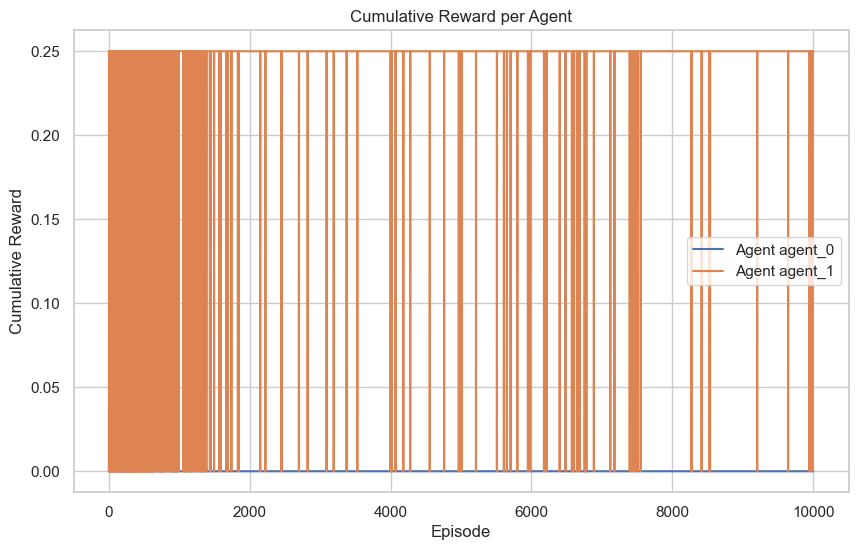

In [8]:
# plot reward per agent
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for agent in game.agents:
    plt.plot(reward_list[agent], label=f"Agent {agent}")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward per Agent")
plt.legend()
plt.show()

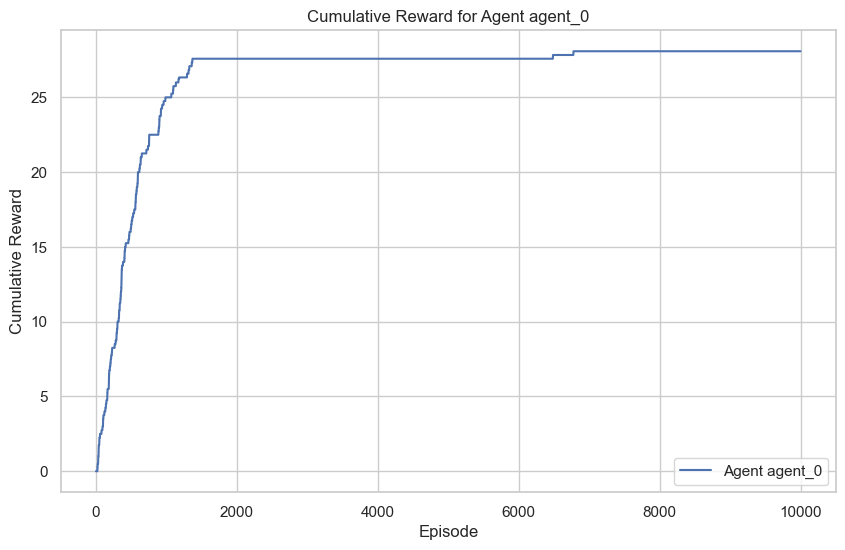

In [9]:
# Plot cumulative reward for a specific agent
agent_to_plot = game.agents[0]  # Replace with the specific agent you want to plot
cumulative_rewards = np.cumsum(reward_list[agent_to_plot])  # Calculate cumulative rewards

plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label=f"Agent {agent_to_plot}")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title(f"Cumulative Reward for Agent {agent_to_plot}")
plt.legend()
plt.show()

In [10]:
run(game, agents, verbose=True, render=True)

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\pyglet\libs\win32\__init__.py:318: UserWarning: Could not set COM MTA mode. Unexpected behavior may occur.
  warnings.warn("Could not set COM MTA mode. Unexpected behavior may occur.")


Agent agent_0 reward: 0
Agent agent_0 observe: [1. 4. 3. 4. 4. 1. 7. 0. 1. 3. 4. 2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [1. 4. 3. 4. 4. 1. 3. 4. 2. 7. 0. 1.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 1.  4.  3. -1. -1.  0.  7.  1.  1.  3.  4.  2.]
Agent agent_1 reward: 0.25
Agent agent_1 observe: [ 1.  4.  3. -1. -1.  0.  3.  4.  2.  7.  1.  1.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 1.  4.  3. -1. -1.  0.  6.  1.  1.  3.  3.  2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [ 1.  4.  3. -1. -1.  0.  3.  3.  2.  6.  1.  1.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 1.  4.  3. -1. -1.  0.  6.  0.  1.  3.  2.  2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [ 1.  4.  3. -1. -1.  0.  3.  2.  2.  6.  0.  1.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 1.  4.  3. -1. -1.  0.  6.  1.  1.  4.  2.  2.]
Agent agent_1 reward: 0
Agent agent_1 observe: [ 1.  4.  3. -1. -1.  0.  4.  2.  2.  6.  1.  1.]
Agent agent_0 reward: 0
Agent agent_0 observe: [ 1.

{'agent_0': 0, 'agent_1': 0.25}

In [8]:
from agents.centralized_q_learning import CentralizedQLearning

game = Foraging(config=None)
centralized_agent = CentralizedQLearning(game)

for episode in range(1000):
    game.reset()
    while not game.done():
        centralized_agent.step()

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\utils\passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'list'>
  logger.warn(


In [56]:
# Initialize centralized Q-learning agent
from agents.centralized_q_learning import CentralizedQLearning

game = Foraging(config="Foraging-5x5-2p-3f-v3")
centralized_agent = CentralizedQLearning(game)

# Track cumulative rewards
cumulative_rewards = []

# Training loop
for episode in range(100000):  # Adjust the number of episodes as needed
    game.reset()
    episode_reward = 0  # Track total reward for the episode
    
    while not game.done():
        centralized_agent.step()
        # Sum up rewards for all agents
        episode_reward += sum(game.rewards[agent] for agent in game.agents)
    
    cumulative_rewards.append(episode_reward)
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}")

c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
c:\Users\marrt\miniconda3\envs\pettingzoo_games\Lib\site-packages\gymnasium\utils\passive_env_checker.py:275: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'list'>
  logger.warn(


Episode 1: Total Reward = 1.0
Episode 2: Total Reward = 0.0
Episode 3: Total Reward = 0.0
Episode 4: Total Reward = 0.4
Episode 5: Total Reward = 0
Episode 6: Total Reward = 0.2
Episode 7: Total Reward = 1.0
Episode 8: Total Reward = 0.0
Episode 9: Total Reward = 0.0
Episode 10: Total Reward = 1.0
Episode 11: Total Reward = 0.25
Episode 12: Total Reward = 0.4
Episode 13: Total Reward = 1.0
Episode 14: Total Reward = 0.0
Episode 15: Total Reward = 0.25
Episode 16: Total Reward = 0.3333333333333333
Episode 17: Total Reward = 0.0
Episode 18: Total Reward = 0.0
Episode 19: Total Reward = 0.0
Episode 20: Total Reward = 0.5
Episode 21: Total Reward = 0.3333333333333333
Episode 22: Total Reward = 0.0
Episode 23: Total Reward = 0.3333333333333333
Episode 24: Total Reward = 0.4
Episode 25: Total Reward = 0.4
Episode 26: Total Reward = 0.0
Episode 27: Total Reward = 1.0
Episode 28: Total Reward = 0.4
Episode 29: Total Reward = 0.0
Episode 30: Total Reward = 0.4
Episode 31: Total Reward = 0.33333

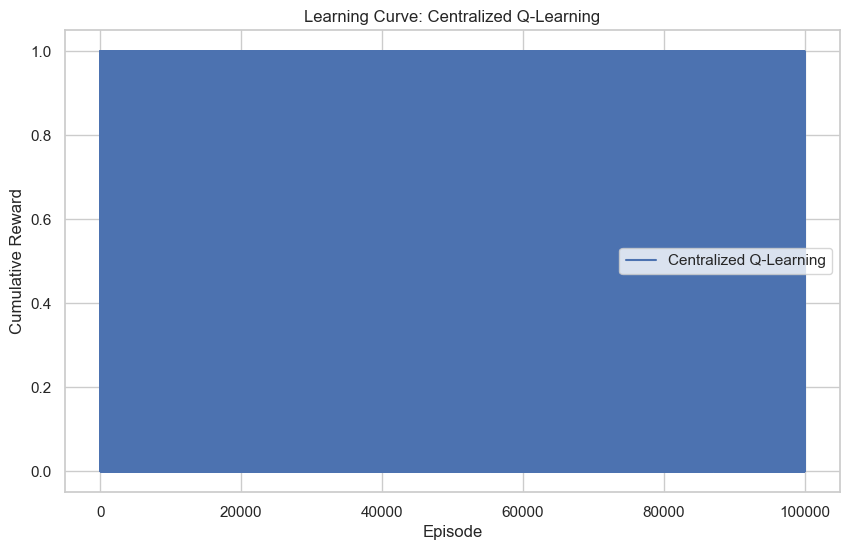

In [57]:
import matplotlib.pyplot as plt

# Plot cumulative rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label="Centralized Q-Learning")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Learning Curve: Centralized Q-Learning")
plt.legend()
plt.show()

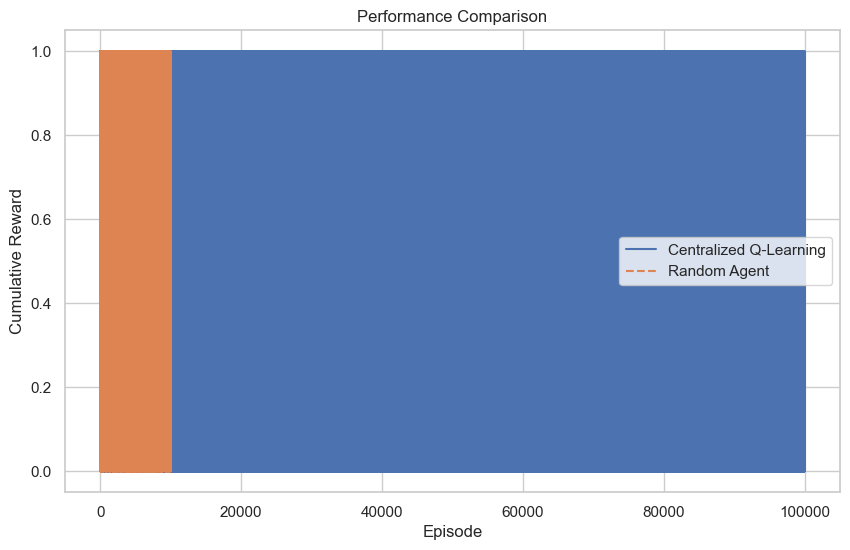

In [58]:
from agents.random_agent import RandomAgent

# Initialize random agents
random_agents = {agent: RandomAgent(game, agent) for agent in game.agents}

# Run random agent simulation
random_rewards = []
for episode in range(10000):
    game.reset()
    episode_reward = 0
    while not game.done():
        actions = {agent: random_agents[agent].action() for agent in game.agents}
        game.step(actions)
        episode_reward += sum(game.rewards[agent] for agent in game.agents)
    random_rewards.append(episode_reward)

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label="Centralized Q-Learning")
plt.plot(random_rewards, label="Random Agent", linestyle="--")
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Performance Comparison")
plt.legend()
plt.show()

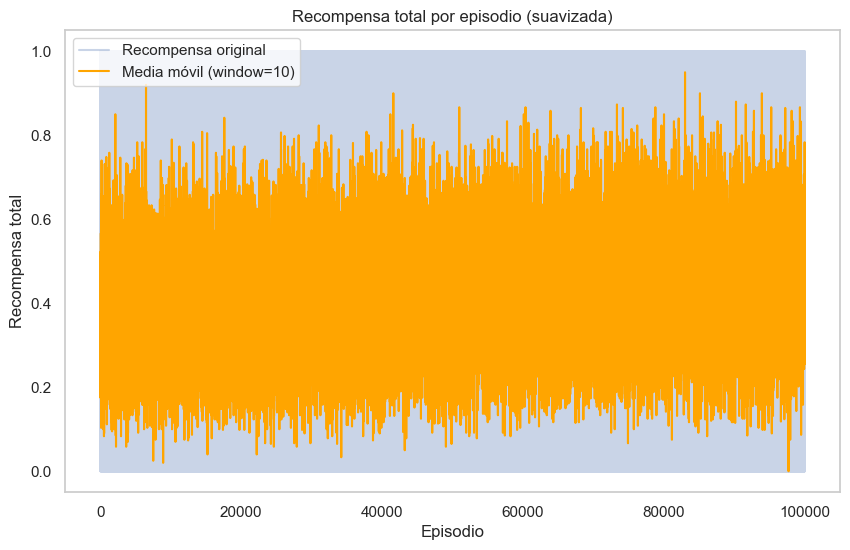

In [62]:
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Crear la curva suavizada
window = 10
smoothed = moving_average(cumulative_rewards, window)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, alpha=0.3, label='Recompensa original')
plt.plot(range(window-1, len(cumulative_rewards)), smoothed, color='orange', label=f'Media móvil (window={window})')
plt.title("Recompensa total por episodio (suavizada)")
plt.xlabel("Episodio")
plt.ylabel("Recompensa total")
plt.legend()
plt.grid()
plt.show()

In [63]:


def evaluate_policy(game, agents, n_episodes=1000, block_size=100, render=False):
    # Fijar epsilon en 0 para política greedy (sin exploración)
    for agent in agents.values():
        agent.epsilon = 0.0

    success_per_episode = []

    for episode in range(n_episodes):
        game.reset()
        total_reward = 0

        if render:
            game.render()

        while not game.done():
            actions = {agent_id: agents[agent_id].action() for agent_id in game.agents}
            game.step(actions)
            total_reward += sum(r if r is not None else 0 for r in game.rewards.values())

            if render:
                game.render()

        # Éxito si al menos una recolección ocurrió (recompensa total positiva)
        success_per_episode.append(1 if total_reward > 0 else 0)

    # Calcular porcentaje de éxito por bloque de 100 episodios
    blocks = len(success_per_episode) // block_size
    success_rate = [
        np.mean(success_per_episode[i*block_size:(i+1)*block_size])
        for i in range(blocks)
    ]

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, blocks+1), success_rate, marker='o', linestyle='-')
    plt.title(f"Porcentaje de éxito cada {block_size} episodios (evaluación sin exploración)")
    plt.xlabel(f"Bloque de {block_size} episodios")
    plt.ylabel("Tasa de éxito")
    plt.ylim(0, 1.05)
    plt.grid(True)
    plt.show()

    return success_rate

In [67]:
evaluate_policy(game, {'agent_0': centralized_agent}, n_episodes=1000, block_size=100, render=False)

AttributeError: 'CentralizedQLearning' object has no attribute 'action'

In [37]:
init = game.env.unwrapped.field
init

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [38]:
game.reset()
game.env.unwrapped.field

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [40]:
game.env.unwrapped.field = init
game.env.unwrapped.field

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [43]:
def _make_state(obs):
        state = str(obs.field)
        for c in ["]", "[", " ", "\n"]:
            state = state.replace(c, "")

        for a in obs.players:
            state = state + str(a.position[0]) + str(a.position[1]) + str(a.level)

        return int(state)

In [45]:
_make_state(game.env.unwrapped)

10020000000000000000000000000000000000020000000000000751732

In [ ]:
game = game.env.unwrapped.from_obs(game.env.unwrapped) 

TypeError: 'list' object cannot be interpreted as an integer

In [49]:
obs = game.env.unwrapped
obs

In [ ]:
game.reset()

In [54]:
game.env.unwrapped.field = obs.field
game.env.unwrapped.players = obs.players
game.env.unwrapped.current_step = obs.current_step
game.env.unwrapped.sight = obs.sight
game.env.unwrapped._gen_valid_moves()

In [55]:
game.step(centralized_agent.step())

TypeError: 'NoneType' object is not subscriptable